<a href="https://colab.research.google.com/github/Rezckant/protein-tertiary-structure/blob/main/PTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warning_alert = 'ignore'

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00265/CASP.csv'
df = pd.read_csv(url)
df

RMSD        F1       F2       F3        F4            F5        F6  \
0      17.284  13558.30  4305.35  0.31754  162.1730  1.872791e+06  215.3590   
1       6.021   6191.96  1623.16  0.26213   53.3894  8.034467e+05   87.2024   
2       9.275   7725.98  1726.28  0.22343   67.2887  1.075648e+06   81.7913   
3      15.851   8424.58  2368.25  0.28111   67.8325  1.210472e+06  109.4390   
4       7.962   7460.84  1736.94  0.23280   52.4123  1.021020e+06   94.5234   
...       ...       ...      ...      ...       ...           ...       ...   
45725   3.762   8037.12  2777.68  0.34560   64.3390  1.105797e+06  112.7460   
45726   6.521   7978.76  2508.57  0.31440   75.8654  1.116725e+06  102.2770   
45727  10.356   7726.65  2489.58  0.32220   70.9903  1.076560e+06  103.6780   
45728   9.791   8878.93  3055.78  0.34416   94.0314  1.242266e+06  115.1950   
45729  18.827  12732.40  4444.36  0.34905  157.6300  1.788897e+06  229.4590   

            F7   F8       F9  
0      4287.87  102  27.0302  
1      3328.91   39  38.5468  
2      2981.04   29  38.8119  
3      3248.22   70  39.0651  
4      2814.42   41  39.9147  
...        ...  ...      ...  
45725  3384.21   84  36.8036  
45726  3974.52   54  36.0470  
45727  3290.46   46  37.4718  
45728  3421.79   41  35.6045  
45729  4626.85  141  29.8118  

[45730 rows x 10 columns]

* RMSD - Size of the residue.
* F1 - Total surface area.
* F2 - Non polar exposed area.
* F3 - Fractional area of exposed non polar residue.
* F4 - Fractional area of exposed non polar part of residue.
* F5 - Molecular mass weighted exposed area.
* F6 - Average deviation from standard exposed area of residue.
* F7 - Euclidian distance.
* F8 - Secondary structure penalty.
* F9 - Spacial Distribution constraints (N,K Value).

In [3]:
!pip install -U pandas-profiling==2.9.0

In [4]:
import pandas_profiling

In [5]:
from pandas_profiling import ProfileReport

# Exploratory Data Analisys - EDA

In [6]:
ProfileReport(df, html={'style':{'full_width':True}})

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* 1711 duplicated rows.
* **RMSD**: There are no null values in the dataset but this column contains zeros.
* **F1**: We can improve its distribution and improve its level of variance.
* **F2**: Good distribution, it is quite well in.
* **F3**: Very Gaussian distribution, low variance,
low skew.
* **F4**: Non-Gaussian distribution, high variance.
* **F5**: We can improve your distribution
* **F6**: We can improve your distribution
* **F7**: No Gaussian distribution, very high Skewness.
* **F8**: We can improve your distribution.
* **F9**: We can improve your distribution.
* **Interactions**: interactions are equal between the variables "X", they interact linearly. Variable "y" does not seem to be highly correlated with the other variables.
* **Correlations**: In general we see that the correlations between the "X" variables are quite high, we will see this better later.|

* **Conclusions**:
    1. We can work on the distribution of the variables.
    2. We should work on the Skewness of the variable F7.
    3. I think that the level of variance of some variables could bias some models so we will do an IQR plot to see how it goes.
    4. The scaling of the variables is absolutely necessary.

In [7]:
df = df.drop_duplicates()

## Correlations

In [8]:
corr = df.corr()

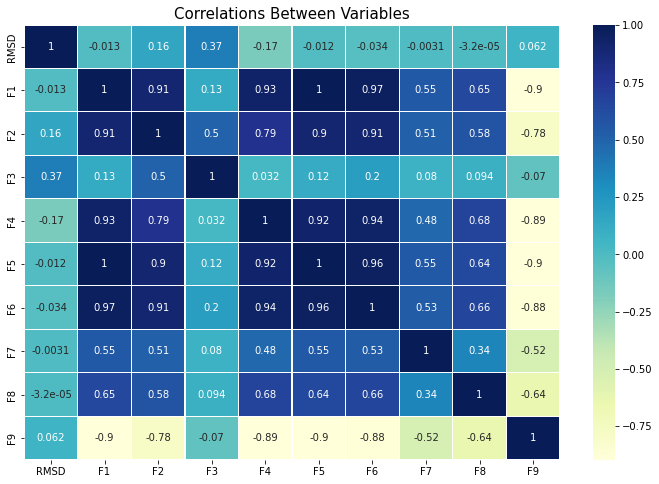

In [9]:
plt.figure(figsize = (12,8))
sns.heatmap(data = corr, cmap= "YlGnBu", annot = True , linewidths=0.2, linecolor = 'white')
plt.title("Correlations Between Variables", size=15)
plt.show()

In [10]:
corr["RMSD"].sort_values(ascending=False)

RMSD    1.000000
F3      0.373389
F2      0.158351
F9      0.061939
F8     -0.000032
F7     -0.003116
F5     -0.011956
F1     -0.013087
F6     -0.034420
F4     -0.169258
Name: RMSD, dtype: float64

* **As we have seen before, many of our "X" variables have a very high correlation, in some cases close to 100%.**
* **I wonder what a PCA analysis would say, how many of the variables are needed to get 90 or 100% of the dimension?**
* **F5 they are very closely related to other variables. I am going to remove them.**

## IQR Analysis

In [11]:
def plot_uni(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(d, kde=True, ax=ax[0])
    ax[0].axvline(d.mean(), color='y', linestyle='--',linewidth=2)
    ax[0].axvline(d.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(d.mode()[0],color='g',linestyle='solid',linewidth=2)
    ax[0].legend({'Mean':d.mean(),'Median':d.median(),'Mode':d.mode()})
    
    sns.boxplot(x=d, showmeans=True, ax=ax[1])
    plt.tight_layout()

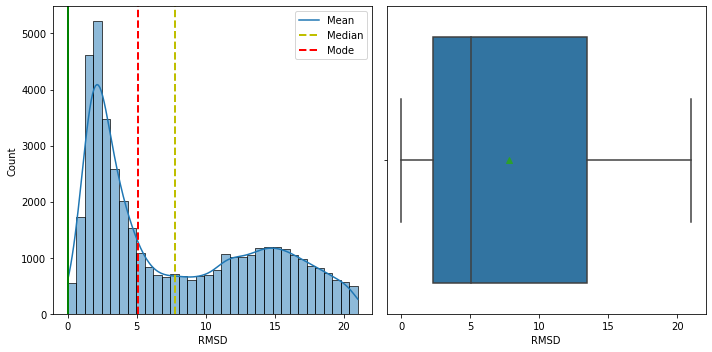

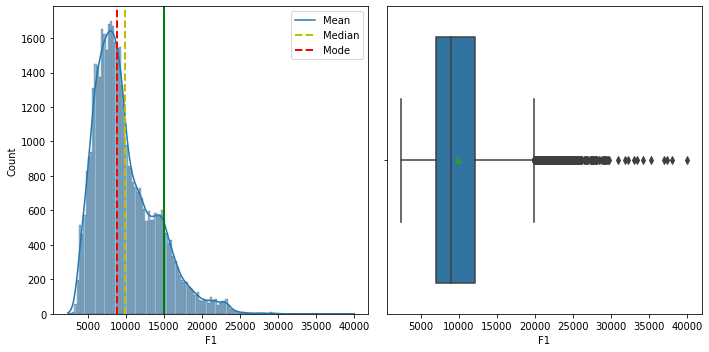

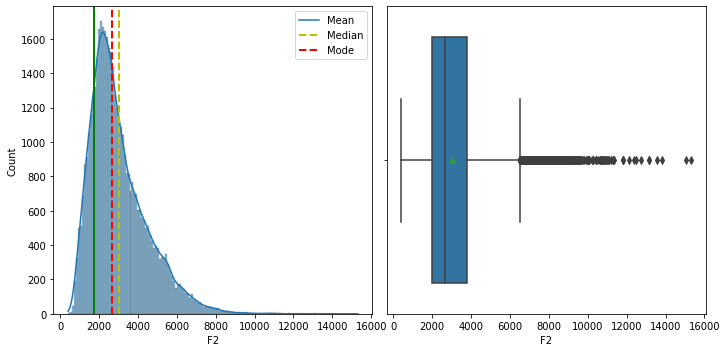

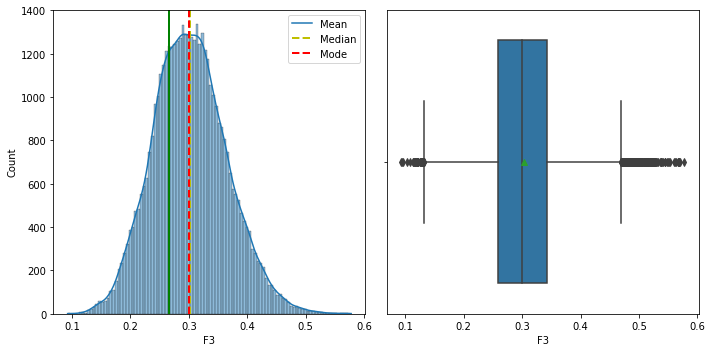

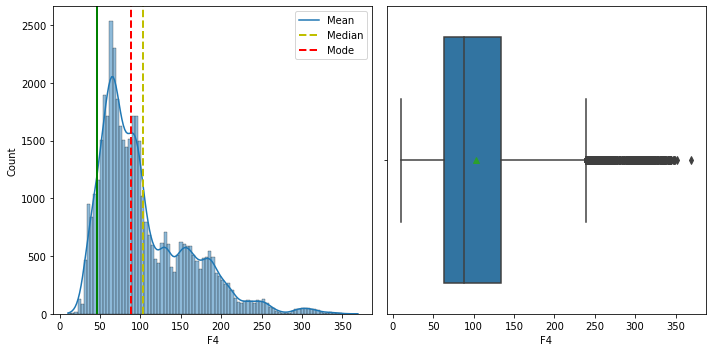

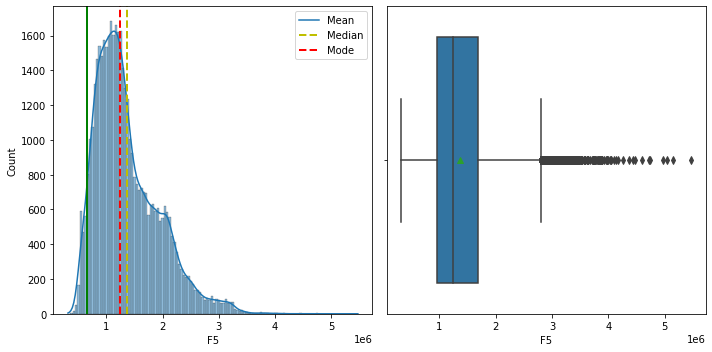

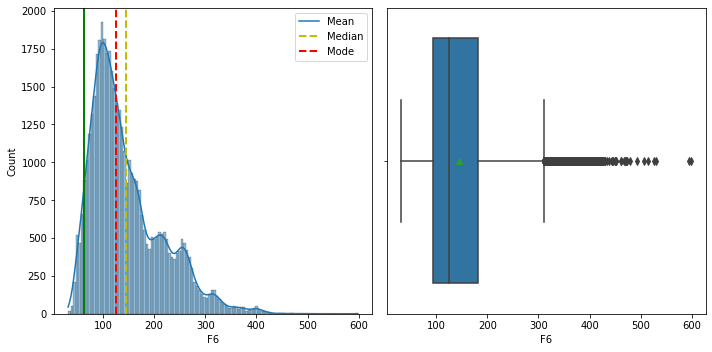

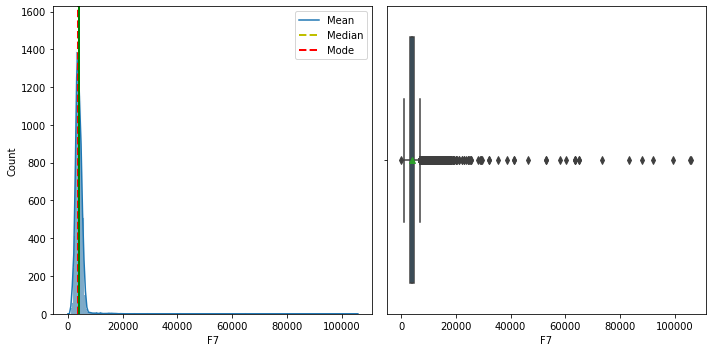

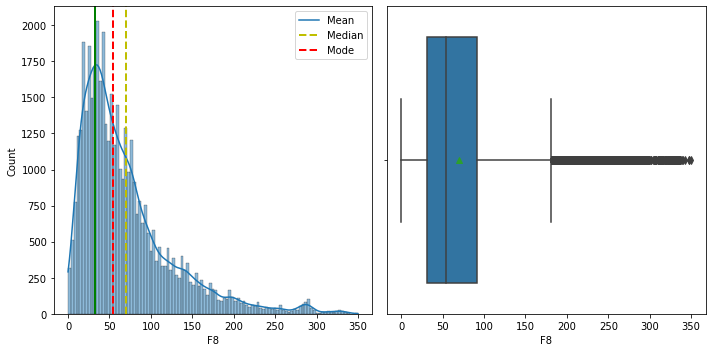

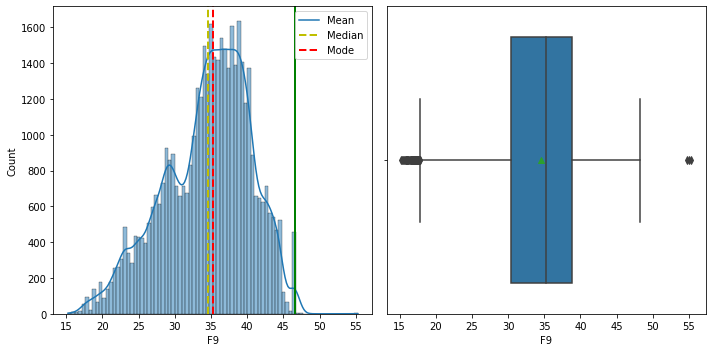

In [12]:
for f in df:
    plot_uni(df[f])

# Skewness

In [13]:
df_skew = pd.DataFrame(data={
    'skewness': df.skew()})   
df_skew

skewness
RMSD   0.552819
F1     1.094760
F2     1.193430
F3     0.239840
F4     1.222133
F5     1.060663
F6     1.119127
F7    21.013368
F8     1.686218
F9    -0.472854

In [14]:
from sklearn import preprocessing
pt = preprocessing.PowerTransformer()

In [15]:
df_eda = df
df_eda['F7'] = pt.fit_transform(df_eda['F7'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df_skew = pd.DataFrame(data={
    'skewness': df_eda.skew()})   
df_skew

skewness
RMSD  0.552819
F1    1.094760
F2    1.193430
F3    0.239840
F4    1.222133
F5    1.060663
F6    1.119127
F7    0.045341
F8    1.686218
F9   -0.472854

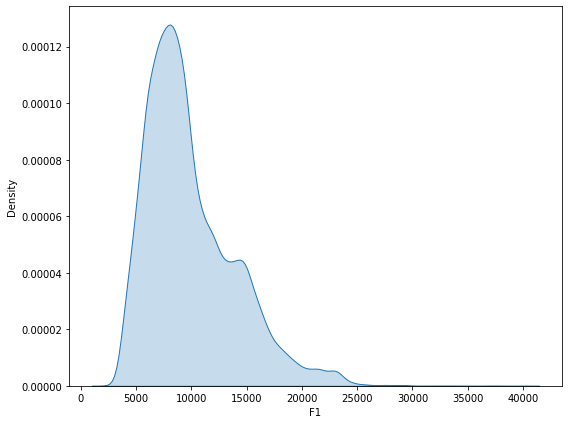

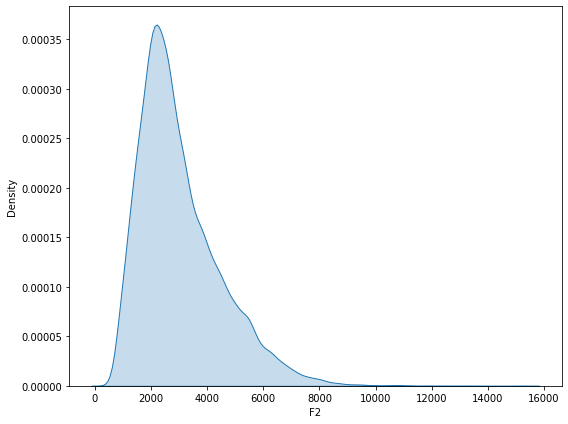

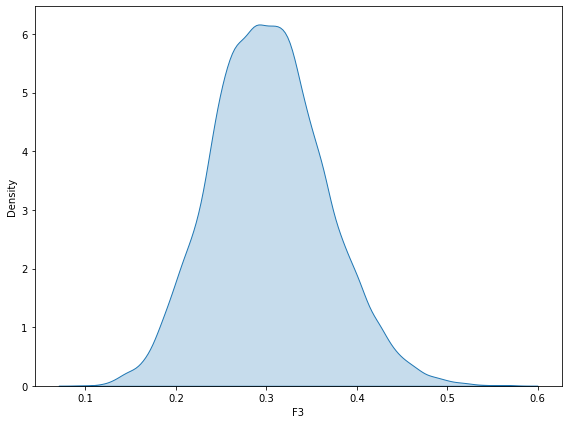

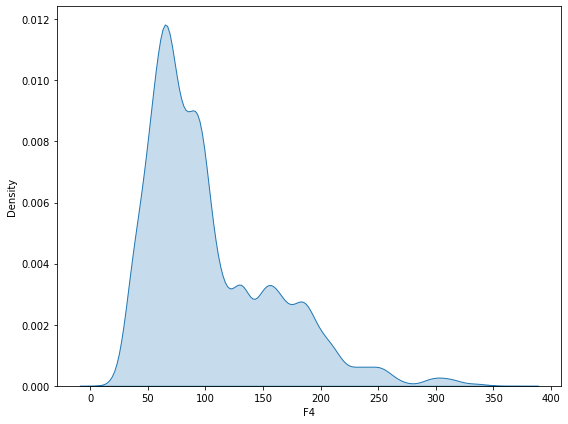

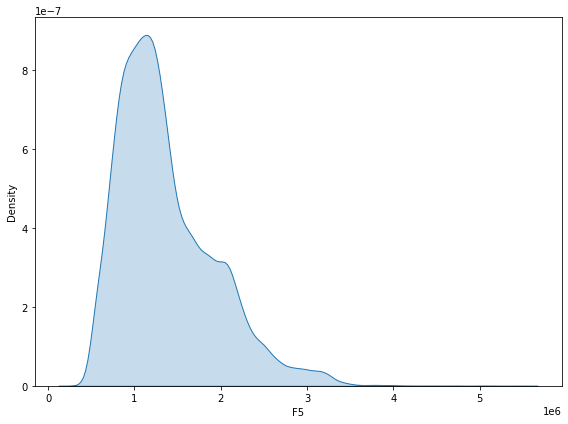

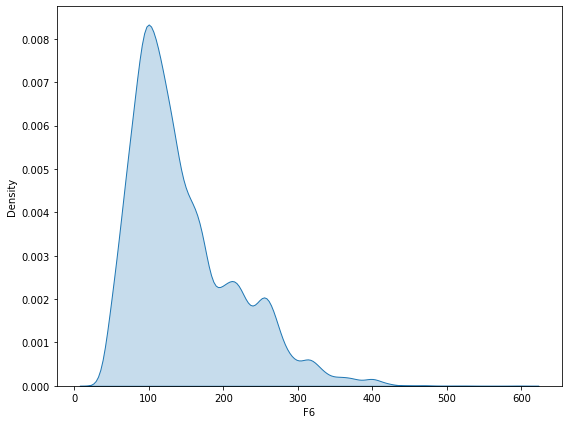

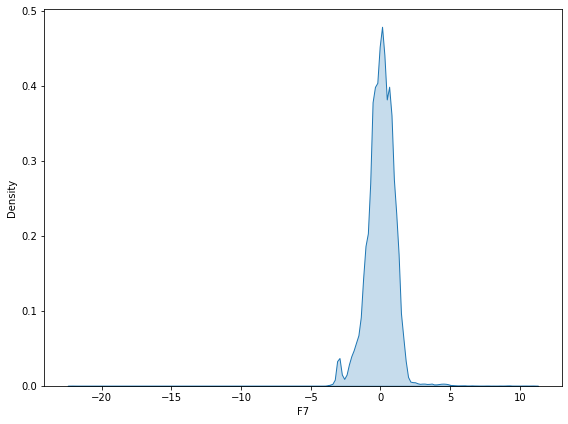

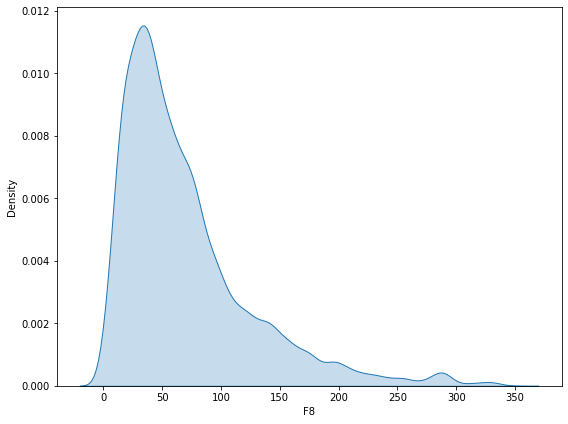

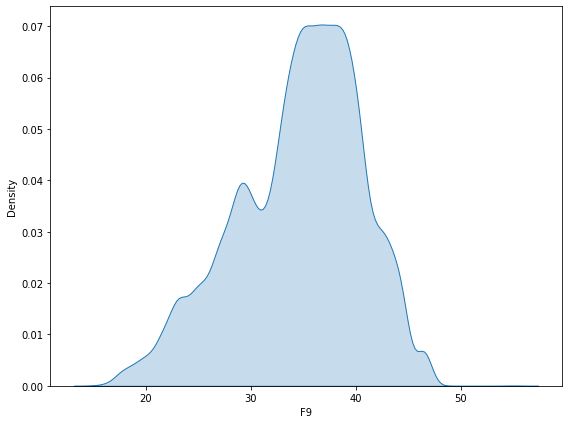

In [17]:
for col in df_eda.drop('RMSD', axis = 1):
  f,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6))    
  sns.kdeplot(data = df_eda, x = col, fill = 'dark', palette = 'dark' )
  plt.tight_layout() 

In [18]:
df_eda

RMSD        F1       F2       F3        F4            F5        F6  \
0      17.284  13558.30  4305.35  0.31754  162.1730  1.872791e+06  215.3590   
1       6.021   6191.96  1623.16  0.26213   53.3894  8.034467e+05   87.2024   
2       9.275   7725.98  1726.28  0.22343   67.2887  1.075648e+06   81.7913   
3      15.851   8424.58  2368.25  0.28111   67.8325  1.210472e+06  109.4390   
4       7.962   7460.84  1736.94  0.23280   52.4123  1.021020e+06   94.5234   
...       ...       ...      ...      ...       ...           ...       ...   
45724  11.354   9106.35  2553.61  0.28042   72.1356  1.231680e+06  124.9890   
45725   3.762   8037.12  2777.68  0.34560   64.3390  1.105797e+06  112.7460   
45726   6.521   7978.76  2508.57  0.31440   75.8654  1.116725e+06  102.2770   
45728   9.791   8878.93  3055.78  0.34416   94.0314  1.242266e+06  115.1950   
45729  18.827  12732.40  4444.36  0.34905  157.6300  1.788897e+06  229.4590   

             F7   F8       F9  
0      0.390341  102  27.0302  
1     -0.392860   39  38.5468  
2     -0.732117   29  38.8119  
3     -0.468399   70  39.0651  
4     -0.908373   41  39.9147  
...         ...  ...      ...  
45724  0.498997   90  36.7669  
45725 -0.342103   84  36.8036  
45726  0.154811   54  36.0470  
45728 -0.308065   41  35.6045  
45729  0.627137  141  29.8118  

[44019 rows x 10 columns]

# How many are the outliers

In [19]:
df_eda2 = df_eda

In [20]:
outliers_cols = []
for col in df_eda2.columns:
    q75,q25 = np.percentile(df_eda2.loc[:,col],[75,25])
    iqr = q75-q25
     
    max = q75+(1.5*iqr)
    min = q25-(1.5*iqr)
    if any(df_eda2[col].values < min) or any(df_eda2[col].values > max):
        outliers_cols.append(col)
print(outliers_cols)        

['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']


In [21]:
df_eda2.shape

(44019, 10)

In [22]:
for col in df_eda2.drop('RMSD', axis = 1):
    if col in outliers_cols:
        q75,q25 = np.percentile(df_eda2.loc[:,col],[75,25])
        iqr = q75-q25
     
        max = q75+(1.5*iqr)
        min = q25-(1.5*iqr)
     
        df_eda2.loc[df[col] < min,col] = np.nan
        df_eda2.loc[df[col] > max,col] = np.nan
print(df_eda2.isna().sum())

RMSD       0
F1      1113
F2      1194
F3       354
F4      1172
F5      1028
F6      1249
F7      1247
F8      2329
F9       147
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [23]:
df_eda2 = df_eda2.dropna()
print(df_eda2.shape)

(39101, 10)


**The null data is a total of 5k, for a dataset with 45k is not a big amount. As expected, the variable with the most outliers was F8, as we could guess from the long tail to the left that we saw in the histogram.**

In [24]:
df_eda = df_eda2

# X and y

In [25]:
df_eda = df_eda.drop(['F5'], axis = 1)
df_eda

RMSD        F1       F2       F3        F4        F6        F7  \
0      17.284  13558.30  4305.35  0.31754  162.1730  215.3590  0.390341   
1       6.021   6191.96  1623.16  0.26213   53.3894   87.2024 -0.392860   
2       9.275   7725.98  1726.28  0.22343   67.2887   81.7913 -0.732117   
3      15.851   8424.58  2368.25  0.28111   67.8325  109.4390 -0.468399   
4       7.962   7460.84  1736.94  0.23280   52.4123   94.5234 -0.908373   
...       ...       ...      ...      ...       ...       ...       ...   
45724  11.354   9106.35  2553.61  0.28042   72.1356  124.9890  0.498997   
45725   3.762   8037.12  2777.68  0.34560   64.3390  112.7460 -0.342103   
45726   6.521   7978.76  2508.57  0.31440   75.8654  102.2770  0.154811   
45728   9.791   8878.93  3055.78  0.34416   94.0314  115.1950 -0.308065   
45729  18.827  12732.40  4444.36  0.34905  157.6300  229.4590  0.627137   

          F8       F9  
0      102.0  27.0302  
1       39.0  38.5468  
2       29.0  38.8119  
3       70.0  39.0651  
4       41.0  39.9147  
...      ...      ...  
45724   90.0  36.7669  
45725   84.0  36.8036  
45726   54.0  36.0470  
45728   41.0  35.6045  
45729  141.0  29.8118  

[39101 rows x 9 columns]

In [26]:
X = df_eda.iloc[:, 1:]
y = df_eda.iloc[:, 0]

In [27]:
X.shape

(39101, 8)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
print(X_train.shape)
print(X_test.shape)

(31280, 8)
(7821, 8)


In [30]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## PCA

In [31]:
X_pca = X
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)

In [32]:
pca.fit_transform(X_pca)

array([[ 4.57504280e+03, -8.96707309e+01,  1.48362258e+01,
        -1.34761041e+01, -2.79717687e+00],
       [-3.26282344e+03,  1.48751694e+02,  2.51552063e-01,
        -1.68472363e-01,  6.45336793e+00],
       [-1.77406822e+03,  5.31568198e+02, -2.31857224e+01,
         2.18778032e+01, -7.42161631e+00],
       ...,
       [-1.28838159e+03, -1.32037196e+02,  1.19421593e+00,
         1.00912692e+01, -7.68456339e+00],
       [-2.61956194e+02, -3.69494925e+02, -1.75316253e+01,
         3.67879924e+00, -1.67751583e+01],
       [ 3.83488615e+03, -4.80477660e+02,  6.18630006e+01,
        -3.00671323e+01,  8.59488918e+00]])

In [33]:
a = pca.explained_variance_ratio_
print(a)

[9.73626141e-01 2.62253461e-02 1.03626113e-04 3.43995215e-05
 1.00347895e-05]


In [34]:
print(a.sum())

0.9999995479316837


# Models

In [35]:
from sklearn import metrics
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)).mean()
    return rmse

In [36]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared


## Linear Regression

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [38]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression = regression.fit(X_train, y_train)
predictions = regression.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(regression)
print("RMSE Cross-Validation:", rmse_cross_val)

MAE: 4.361533965336185
MSE: 27.27499359774149
RMSE: 5.222546658263714
R2 Score: 0.28064580330464706
------------------------------
RMSE Cross-Validation: 5.141965069983453


In [39]:
new_row = {"Model": "Linear Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

## Polynomial regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions) #Repeat
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

print("RMSE Cross-Validation:", rmse_cross_val)

MAE: 4.090671231254945
MSE: 24.929665333911558
RMSE: 4.992961579454779
R2 Score: 0.34250179323067176
------------------------------
RMSE Cross-Validation: 5.141965069983453


In [41]:
new_row = {"Model": "Polynomial Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

## Gradient Boosting Regression

In [42]:
from sklearn import ensemble
from sklearn.utils import shuffle

params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}
gbr = ensemble.GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)
predictions = gbr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions) #Repeat
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(gbr)
print("RMSE Cross-Validation:", rmse_cross_val)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


MAE: 3.863254801094792
MSE: 22.754215581624518
RMSE: 4.770137899644466
R2 Score: 0.39987738539715834
------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in v

RMSE Cross-Validation: 4.683630965542478


In [43]:
new_row = {"Model": "Gradient Bosting Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

## Light GBM

In [44]:
import lightgbm as lgb
lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
lgb.fit(X_train,y_train)
predictions = lgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions) #Repeat
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lgb)
print("RMSE Cross-Validation:", rmse_cross_val)

MAE: 4.214711640073669
MSE: 26.23072250440718
RMSE: 5.121593746521406
R2 Score: 0.3081875437192033
------------------------------
RMSE Cross-Validation: 5.021819079770693


In [45]:
new_row = {"Model": "Light GBM","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

## Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)
predictions = rfr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions) #Repeat
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(rfr)
print("RMSE Cross-Validation:", rmse_cross_val)

MAE: 2.5738276269749942
MSE: 13.620419747411173
RMSE: 3.690585285210352
R2 Score: 0.6407732940086261
------------------------------
RMSE Cross-Validation: 3.60580366758935


In [47]:
new_row = {"Model": "Random Forest","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

## Ridge Regression

In [48]:
from sklearn import linear_model
rid = linear_model.Ridge()
rid.fit(X_train, y_train)
predictions = rid.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions) #Repeat
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(rid)
print("RMSE Cross-Validation:", rmse_cross_val)

MAE: 4.3615876215373115
MSE: 27.274971448886824
RMSE: 5.222544537760001
R2 Score: 0.2806463874613948
------------------------------
RMSE Cross-Validation: 5.141965137528331


In [49]:
new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

# Result

In [53]:
models.sort_values(by="RMSE (Cross-Validation)")

Model       MAE        MSE      RMSE  R2 Score  \
4                Random Forest  2.573828  13.620420  3.690585  0.640773   
2  Gradient Bosting Regression  3.863255  22.754216  4.770138  0.399877   
3                    Light GBM  4.214712  26.230723  5.121594  0.308188   
0            Linear Regression  4.361534  27.274994  5.222547  0.280646   
1        Polynomial Regression  4.090671  24.929665  4.992962  0.342502   
5                        Ridge  4.361588  27.274971  5.222545  0.280646   

   RMSE (Cross-Validation)  
4                 3.605804  
2                 4.683631  
3                 5.021819  
0                 5.141965  
1                 5.141965  
5                 5.141965